**Análisis del Dataset Enron-Spam mediante Técnicas de Machine Learning**

En este apartado se presenta el análisis del dataset Enron-Spam, el cual contiene correos electrónicos clasificados como spam y ham (no spam). Dicho conjunto de datos se encuentra disponible en la siguiente dirección: Khttps://www.kaggle.com/datasets/marcelwiechmann/enron-spam-data
.

**Fase I.-** En esta primera fase se realiza la importación de las librerías para el análisis, así como una exploración inicial del dataset Enron-Spam. El objetivo es conocer la estructura de los datos y preparar el entorno de trabajo para aplicar las técnicas de Machine Learning en fases posteriores.

In [14]:
# Librerías de sistema y manejo de datos
import os   # Permite interactuar con el sistema operativo (rutas, carpetas, archivos)
import pandas as pd   # Librería para manejo y análisis de datos en tablas (DataFrames)

# Librerías de visualización
import matplotlib.pyplot as plt   # Librería para crear gráficos básicos
import seaborn as sns   # Librería para crear gráficos estadísticos más atractivos

# Librería para trabajar con expresiones regulares
import re   # Útil para limpiar texto (eliminar símbolos, URLs, etc.)

In [15]:
# Librerías de Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer   # Convierte texto en vectores numéricos con TF-IDF
from sklearn.model_selection import train_test_split   # Divide los datos en entrenamiento y prueba
from sklearn.linear_model import LogisticRegression   # Modelo de clasificación (spam / no spam, etc.)
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
# accuracy_score -> mide el porcentaje de aciertos del modelo
# classification_report -> muestra precision, recall y F1-score
# ConfusionMatrixDisplay -> grafica la matriz de confusión

**Fase 2.-** Descargar el Dataset

In [19]:
# Descargar la ultima version de los datos
import kagglehub # Import kagglehub
import os # Import os to join paths

path = kagglehub.dataset_download("marcelwiechmann/enron-spam-data")
csv_path = os.path.join(path, "enron_spam_data.csv")

# Lear the CSV file
df = pd.read_csv(csv_path)
# Checar los primeros 5 datos
print(df.head())

Using Colab cache for faster access to the 'enron-spam-data' dataset.
   Unnamed: 0                       Subject  \
0           0  christmas tree farm pictures   
1           1      vastar resources , inc .   
2           2  calpine daily gas nomination   
3           3                    re : issue   
4           4     meter 7268 nov allocation   

                                             Message Spam/Ham        Date  
0                                                NaN      ham  1999-12-10  
1  gary , production from the high island larger ...      ham  1999-12-13  
2             - calpine daily gas nomination 1 . doc      ham  1999-12-14  
3  fyi - see note below - already done .\nstella\...      ham  1999-12-14  
4  fyi .\n- - - - - - - - - - - - - - - - - - - -...      ham  1999-12-14  


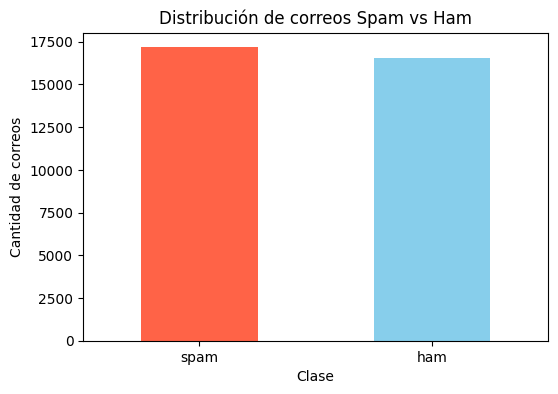

In [20]:
class_counts = df["Spam/Ham"].value_counts()  # Ver distribución de clases,
# Existen 17,171 correos de spam y 16,545 de no espam

# Gráfico de frecuencia de los correos
plt.figure(figsize=(6,4))
class_counts.plot(kind="bar", color=["tomato", "skyblue"])  # Colores diferentes para cada clase
plt.title("Distribución de correos Spam vs Ham")
plt.xlabel("Clase")
plt.ylabel("Cantidad de correos")
plt.xticks(rotation=0)  # Mantener etiquetas horizontales
plt.show()

**Fase 3**.- Limpieza del texto o preprocesamiento del texto es necesario para eliminar elementos irrelevantes que pueden afectar el rendimiento del modelo

In [22]:

#3. Limpiar texto

import re  # Librería de expresiones regulares (para buscar y reemplazar patrones en el texto)

# Función para limpiar el texto de los correos
def clean_text(text):
    # Si el valor es NaN (faltante), devolver un string vacío
    if pd.isna(text):
        return ""
    # Convertir todo el texto a minúsculas
    text = text.lower()
    # Eliminar URLs (ej. http://example.com)
    text = re.sub(r"http\S+", " ", text)
    # Eliminar números
    text = re.sub(r"\d+", " ", text)
    # Eliminar signos de puntuación y caracteres especiales (solo dejar letras y espacios)
    text = re.sub(r"[^\w\s]", " ", text)
    return text  # Devolver el texto limpio

# Crear nueva columna "text" uniendo el Subject y Message (si hay NaN se reemplaza con "")
# Luego se aplica la función de limpieza definida arriba
df["text"] = (df["Subject"].fillna("") + " " + df["Message"].fillna("")).apply(clean_text)

# Normalizar etiquetas: convertir columna "Spam/Ham" a minúsculas y guardarla como "label"
df["label"] = df["Spam/Ham"].str.lower()

# 3. Vectorización con TF-IDF


# Inicializar el vectorizador TF-IDF
# - stop_words="english": elimina palabras vacías comunes en inglés (ej. "the", "and", "is")
# - max_features=5000: se limita a las 5000 palabras más relevantes
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)

# Transformar el texto en una matriz numérica (X = características, y = etiquetas)
X = vectorizer.fit_transform(df["text"])  # Matriz TF-IDF del texto
y = df["label"]  # Variable objetivo (spam o ham)


Fase 4.- Modelo de Machine Learning de clasificación


Regresión Logistica


La fórmula de la regresión logística es:

P(spam | x) = 1 / (1 + e^-(b0 + b1*x1 + b2*x2 + ... + bn*xn))

Donde:

- b0 = intercepto
- bi = coeficientes asociados a cada palabra
- xi = valor TF-IDF de la palabra i en el correo a clasificar

El modelo predice spam si P > 0.5

In [23]:
#División de los datos de purba (train) y de testeo (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 7. Clasificador: Regresión Logística
log_model = LogisticRegression(max_iter=1000, solver="liblinear")
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

**Fase 5.- **Evaluación del modelo de regresión Logistica

Accuracy: 0.9991103202846975
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3309
        spam       1.00      1.00      1.00      3435

    accuracy                           1.00      6744
   macro avg       1.00      1.00      1.00      6744
weighted avg       1.00      1.00      1.00      6744



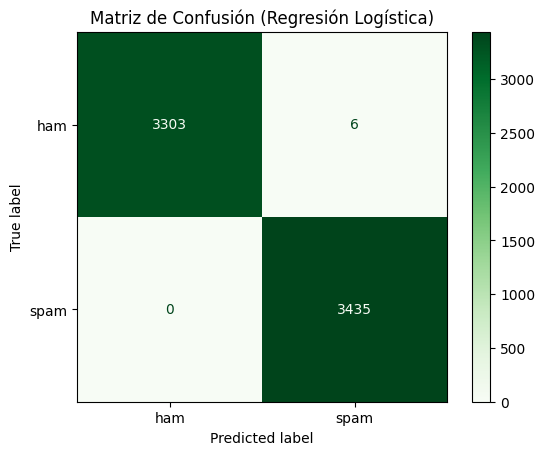

In [25]:
# 5. Evaluación
y_pred = log_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Matriz de confusión
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, cmap="Greens")
plt.title("Matriz de Confusión (Regresión Logística)")
plt.show()